In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
%matplotlib inline

#Library for statistics operation
import scipy.stats as stats

# Date Time library
from datetime import datetime

#Machine learning Library
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
#np.set_printoptions(threshold=np.nan)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
# Importing training data set
train = pd.read_csv("train.csv")

#Import Test Data
test=pd.read_csv("test.csv")

# Import Store data set
stores = pd.read_csv("stores.csv")

# Now import features data set
feature = pd.read_csv("features.csv")

In [3]:
# For Train data set
train_bt = pd.merge(train,stores) 
train = pd.merge(train_bt,feature)
 
#For test data set
test_bt = pd.merge(test,stores)
test= pd.merge(test_bt,feature)

In [4]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [5]:
test.head(2)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [6]:
print (train.info())
print ("*****************************************")
print (test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB
None
*****************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
Store           115064 non-nu

In [7]:
# tale only those values whose sales is positive. 
train = train[train['Weekly_Sales']>0]

In [8]:
numeric_var_train=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_train=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object']]

# Train Numerical Data
train_num=train[numeric_var_train]

# Train Categorical Data
train_cat=train[cat_var_train]

print (numeric_var_train)
print (cat_var_train)

['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
['Date', 'Type']


In [9]:
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [10]:
num_summary=train_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,420212.0,0.0,9.326862e+06,22.195611,22.000000,12.787236,1.635134e+02,1.000,1.000000,3.000000,5.000000,11.000000,22.000000,33.000000,40.000000,43.000000,45.000000,45.000000
Dept,420212.0,0.0,1.859073e+07,44.241309,37.000000,30.508819,9.307880e+02,1.000,1.000000,4.000000,7.000000,18.000000,37.000000,74.000000,92.000000,95.000000,98.000000,99.000000
Weekly_Sales,420212.0,0.0,6.737307e+09,16033.114591,7661.700000,22729.492116,5.166298e+08,0.010,7.440000,67.551000,311.186000,2120.130000,7661.700000,20271.265000,42922.748000,61275.522000,106566.351400,693099.360000
Size,420212.0,0.0,5.746388e+10,136749.732787,140167.000000,60993.084568,3.720156e+09,34875.000,34875.000000,39690.000000,39910.000000,93638.000000,140167.000000,202505.000000,204184.000000,206302.000000,219622.000000,219622.000000
Temperature,420212.0,0.0,2.525079e+07,60.090599,62.090000,18.447857,3.403234e+02,-2.060,18.300000,27.310000,33.980000,46.680000,62.090000,74.280000,83.580000,87.270000,92.810000,100.140000
Fuel_Price,420212.0,0.0,1.412286e+06,3.360890,3.452000,0.458519,2.102398e-01,2.472,2.565000,2.653000,2.720000,2.933000,3.452000,3.738000,3.917000,4.029000,4.202000,4.468000
MarkDown1,150181.0,270031.0,1.088485e+09,7247.821269,5347.450000,8293.028741,6.877433e+07,0.270,17.760000,149.190000,375.200000,2240.270000,5347.450000,9210.900000,15282.470000,21801.350000,41524.030000,88646.760000
MarkDown2,110904.0,309308.0,3.693265e+08,3330.146158,192.000000,9460.395025,8.949907e+07,-265.760,-0.990000,1.950000,6.980000,41.600000,192.000000,1926.940000,8549.740000,16497.470000,50366.600000,104519.540000
MarkDown3,136651.0,283561.0,1.970147e+08,1441.736203,24.600000,9631.968459,9.277482e+07,-29.100,0.060000,0.650000,1.650000,5.100000,24.600000,103.990000,400.090000,1059.900000,63143.290000,141630.610000
MarkDown4,134518.0,285694.0,4.553141e+08,3384.782267,1481.310000,6295.136952,3.962875e+07,0.220,3.970000,28.760000,108.710000,504.220000,1481.310000,3595.040000,7871.420000,12645.960000,35785.260000,67474.850000


In [11]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=train_cat.apply(lambda x: cat_summary(x))
cat_summary

,Date,Type
N,420212,420212
NMISS,0,0
ColumnsNames,2011-12-23 3018 2011-11-25 3016 2011-12-...,A 214961 B 162787 C 42464 Name: Type...


In [12]:
numeric_var_test=[key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_test=[key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['object']]

# Train Numerical Data
test_num=test[numeric_var_test]

# Train Categorical Data
test_cat=test[cat_var_test]

print (numeric_var_test)
print (cat_var_test)

['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
['Date', 'Type']


In [13]:
# Numerical data summary report
num_summary=test_num.apply(lambda x: var_summary(x)).T

num_summary.head()

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,115064.0,0.0,2.558817e+06,22.238207,22.000,12.809930,1.640943e+02,1.000,1.000,3.000,5.000,11.000,22.000,33.000,40.000,43.000,45.000,45.000
Dept,115064.0,0.0,5.101883e+06,44.339524,37.000,30.656410,9.398155e+02,1.000,1.000,4.000,7.000,18.000,37.000,74.000,92.000,95.000,98.000,99.000
Size,115064.0,0.0,1.570597e+10,136497.688921,140167.000,61106.926438,3.734056e+09,34875.000,34875.000,39690.000,39910.000,93638.000,140167.000,202505.000,204184.000,206302.000,219622.000,219622.000
Temperature,115064.0,0.0,6.206760e+06,53.941804,54.470,18.724153,3.505939e+02,-7.290,11.440,23.980,29.970,39.820,54.470,67.350,79.480,83.820,92.140,101.950
Fuel_Price,115064.0,0.0,4.121070e+05,3.581546,3.606,0.239442,5.733244e-02,2.872,2.957,3.161,3.227,3.431,3.606,3.766,3.866,3.951,4.079,4.125


In [14]:
# categorical data summary report
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=test_cat.apply(lambda x: cat_summary(x))
cat_summary

,Date,Type
N,115064,115064
NMISS,0,0
ColumnsNames,2012-12-21 3002 2012-12-07 2989 2012-12-...,"A 58713 B 44500 C 11851 Name: Type, d..."


In [15]:
# Run Pandas profilingto see the over all report
#import pandas_profiling
#pandas_profiling.ProfileReport(test)

In [16]:
# Correlation for train data
train_corr=pd.DataFrame(train.corr())
train_corr.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.024258,-0.085117,-0.000522,-0.182763,-0.050230,0.065321,-0.119676,-0.034993,-0.031475,-0.009991,-0.026777,-0.211261,0.208759
Dept,0.024258,1.000000,0.148749,0.000663,-0.002491,0.004727,0.003544,-0.002512,0.000018,0.001855,0.004176,0.000295,-0.007178,0.007787
Weekly_Sales,-0.085117,0.148749,1.000000,0.012843,0.244117,-0.002339,0.000089,0.085325,0.024565,0.060304,0.045325,0.090561,-0.021162,-0.025806
IsHoliday,-0.000522,0.000663,0.012843,1.000000,0.000797,-0.155775,-0.078155,-0.035632,0.334327,0.428364,-0.000459,-0.053696,-0.001933,0.010555
Size,-0.182763,-0.002491,0.244117,0.000797,1.000000,-0.058413,0.003632,0.345732,0.108843,0.048935,0.168266,0.304814,-0.003903,-0.068335


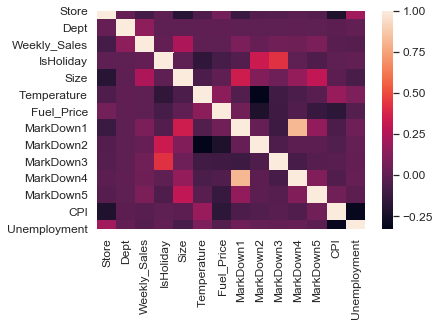

In [17]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(train.corr())

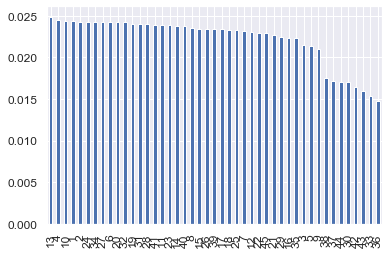

In [18]:
# Store wise sales plot
train['Store'].value_counts(normalize=True).plot(kind = 'bar',fig=(4,5))

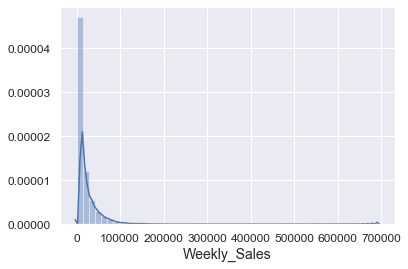

In [19]:
# weekly sales plot
sns.distplot(train.Weekly_Sales)

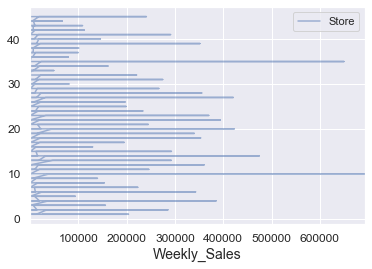

In [20]:
# Store wise sales
train.plot(kind='line', x='Weekly_Sales', y='Store', alpha=0.5)

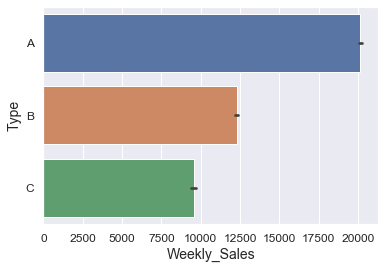

In [21]:
# Weekly sales Type wise
sns.barplot(x=train["Weekly_Sales"],y=train["Type"])

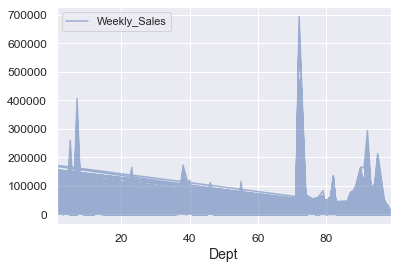

In [22]:
train.plot(kind='line', x='Dept', y='Weekly_Sales', alpha=0.5,fig=(4,5))

In [23]:
print (train.isnull().sum())
print ("*"*30)
print (test.isnull().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270031
MarkDown2       309308
MarkDown3       283561
MarkDown4       285694
MarkDown5       269283
CPI                  0
Unemployment         0
dtype: int64
******************************
Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64


In [24]:
test['CPI']=test.groupby(['Dept'])['CPI'].transform(lambda x: x.fillna(x.mean()))
test['Unemployment']=test.groupby(['Dept'])['Unemployment'].transform(lambda x: x.fillna(x.mean()))

In [25]:
train=train.fillna(0)
test=test.fillna(0)

In [26]:
# Recheck the missing values.

print (train.isnull().sum())
print ("*"*30)
print (test.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64
******************************
Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64


In [27]:
train.Weekly_Sales=np.where(train.Weekly_Sales>100000, 100000,train.Weekly_Sales)

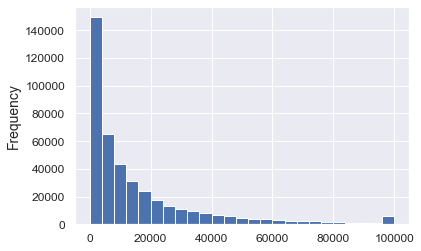

In [28]:
train.Weekly_Sales.plot.hist(bins=25)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420212 entries, 0 to 421569
Data columns (total 16 columns):
Store           420212 non-null int64
Dept            420212 non-null int64
Date            420212 non-null object
Weekly_Sales    420212 non-null float64
IsHoliday       420212 non-null bool
Type            420212 non-null object
Size            420212 non-null int64
Temperature     420212 non-null float64
Fuel_Price      420212 non-null float64
MarkDown1       420212 non-null float64
MarkDown2       420212 non-null float64
MarkDown3       420212 non-null float64
MarkDown4       420212 non-null float64
MarkDown5       420212 non-null float64
CPI             420212 non-null float64
Unemployment    420212 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 64.5+ MB


In [30]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [31]:
# Extract date features
train['Date_dayofweek'] =train['Date'].dt.dayofweek
train['Date_month'] =train['Date'].dt.month 
train['Date_year'] =train['Date'].dt.year
train['Date_day'] =train['Date'].dt.day 

# For test data
test['Date_dayofweek'] =test['Date'].dt.dayofweek
test['Date_month'] =test['Date'].dt.month 
test['Date_year'] =test['Date'].dt.year
test['Date_day'] =test['Date'].dt.day

In [32]:
print (train.Type.value_counts())
print ("*"*30)
print (test.Type.value_counts())

A    214961
B    162787
C     42464
Name: Type, dtype: int64
******************************
A    58713
B    44500
C    11851
Name: Type, dtype: int64


In [33]:
print (train.IsHoliday.value_counts())
print ("*"*30)
print (test.IsHoliday.value_counts())

False    390652
True      29560
Name: IsHoliday, dtype: int64
******************************
False    106136
True       8928
Name: IsHoliday, dtype: int64


In [34]:
# Combine train and test with Key
train_test_data = [train, test]

In [35]:
train_test_data[0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_dayofweek,Date_month,Date_year,Date_day
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,4,2,2010,5
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,4,2,2010,5
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,4,2,2010,5
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,4,2,2010,5
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,4,2,2010,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,4,10,2012,26
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,4,10,2012,26
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,4,10,2012,26
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,4,10,2012,26


In [36]:
type_mapping = {"A": 1, "B": 2, "C": 3}
for dataset in train_test_data:
    dataset['Type'] = dataset['Type'].map(type_mapping)

In [37]:
# For Train Data Set
train['Super_Bowl'] = np.where((train['Date']==datetime(2010, 2, 12)) | (train['Date']==datetime(2011, 2, 11)) | (train['Date']==datetime(2012, 2, 10)) | (train['Date']==datetime(2013, 2, 8)),1,0)
train['Labour_Day'] = np.where((train['Date']==datetime(2010, 9, 10)) | (train['Date']==datetime(2011, 9, 9)) | (train['Date']==datetime(2012, 9, 7)) | (train['Date']==datetime(2013, 9, 6)),1,0)
train['Thanksgiving'] = np.where((train['Date']==datetime(2010, 11, 26)) | (train['Date']==datetime(2011, 11, 25)) | (train['Date']==datetime(2012, 11, 23)) | (train['Date']==datetime(2013, 11, 29)),1,0)
train['Christmas'] = np.where((train['Date']==datetime(2010, 12, 31)) | (train['Date']==datetime(2011, 12, 30)) | (train['Date']==datetime(2012, 12, 28)) | (train['Date']==datetime(2013, 12, 27)),1,0)

#For Test Data set........................................................................
test['Super_Bowl'] = np.where((test['Date']==datetime(2010, 2, 12)) | (test['Date']==datetime(2011, 2, 11)) | (test['Date']==datetime(2012, 2, 10)) | (test['Date']==datetime(2013, 2, 8)),1,0)
test['Labour_Day'] = np.where((test['Date']==datetime(2010, 9, 10)) | (test['Date']==datetime(2011, 9, 9)) | (test['Date']==datetime(2012, 9, 7)) | (test['Date']==datetime(2013, 9, 6)),1,0)
test['Thanksgiving'] = np.where((test['Date']==datetime(2010, 11, 26)) | (test['Date']==datetime(2011, 11, 25)) | (test['Date']==datetime(2012, 11, 23)) | (test['Date']==datetime(2013, 11, 29)),1,0)
test['Christmas'] = np.where((test['Date']==datetime(2010, 12, 31)) | (test['Date']==datetime(2011, 12, 30)) | (test['Date']==datetime(2012, 12, 28)) | (test['Date']==datetime(2013, 12, 27)),1,0)

In [38]:
# Change the isHoliday value depending on these new holidays...
train['IsHoliday']=train['IsHoliday']|train['Super_Bowl']|train['Labour_Day']|train['Thanksgiving']|train['Christmas']
test['IsHoliday']=test['IsHoliday']|test['Super_Bowl']|test['Labour_Day']|test['Thanksgiving']|test['Christmas']

In [39]:
# Count of holiday for train data
print(train.Christmas.value_counts())
print(train.Super_Bowl.value_counts())
print(train.Thanksgiving.value_counts())
print(train.Labour_Day.value_counts())

0    414303
1      5909
Name: Christmas, dtype: int64
0    411339
1      8873
Name: Super_Bowl, dtype: int64
0    414266
1      5946
Name: Thanksgiving, dtype: int64
0    411380
1      8832
Name: Labour_Day, dtype: int64


In [40]:
# Count of holiday for Test data
print (test.Christmas.value_counts())
print (test.Super_Bowl.value_counts())
print (test.Thanksgiving.value_counts())
print (test.Labour_Day.value_counts())

0    112076
1      2988
Name: Christmas, dtype: int64
0    112100
1      2964
Name: Super_Bowl, dtype: int64
0    112088
1      2976
Name: Thanksgiving, dtype: int64
0    115064
Name: Labour_Day, dtype: int64


In [41]:
#df_temp = pd.DataFrame()

In [42]:
train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Date_dayofweek',
       'Date_month', 'Date_year', 'Date_day', 'Super_Bowl', 'Labour_Day',
       'Thanksgiving', 'Christmas'],
      dtype='object')

In [43]:
cols = ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Date_dayofweek',
       'Date_month', 'Date_year', 'Date_day']

In [44]:
#df_temp.head()

In [45]:
# Since we have Imputed IsHoliday according to Extra holidays..These extra holiday variable has redundant..
# Droping the Extra holiday variables because its redundant..
dp=['Super_Bowl','Labour_Day','Thanksgiving','Christmas']

train.drop(dp,axis=1,inplace=True)
test.drop(dp,axis=1,inplace=True)

In [46]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_dayofweek,Date_month,Date_year,Date_day
0,1,1,2010-02-05,24924.50,False,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010,5
1,1,2,2010-02-05,50605.27,False,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010,5
2,1,3,2010-02-05,13740.12,False,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010,5
3,1,4,2010-02-05,39954.04,False,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010,5
4,1,5,2010-02-05,32229.38,False,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010,5


In [47]:
features_drop=['Unemployment','CPI','MarkDown5']
train=train.drop(features_drop, axis=1)
test=test.drop(features_drop, axis=1)

In [48]:
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Date_dayofweek,Date_month,Date_year,Date_day
0,1,1,2010-02-05,24924.50,False,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5
1,1,2,2010-02-05,50605.27,False,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5


In [49]:
test.head(2)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Date_dayofweek,Date_month,Date_year,Date_day
0,1,1,2012-11-02,False,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2
1,1,2,2012-11-02,False,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2


In [50]:
# Converting all float var to int integer..
for var in train:
    if train[var].dtypes == float:
        train[var]=train[var].astype(int)
        
for var in test:
    if test[var].dtypes == float:
        test[var]=test[var].astype(int)

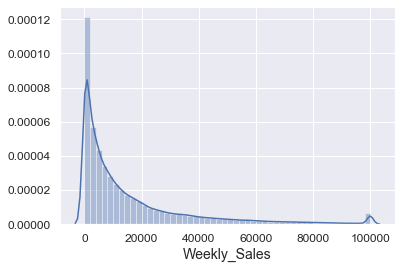

In [51]:
import seaborn as sns
sns.distplot(train.Weekly_Sales)

In [52]:
train['Weekly_Sales']=np.log(train['Weekly_Sales']+1)

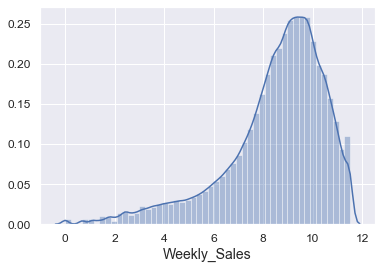

In [53]:
sns.distplot(train.Weekly_Sales)


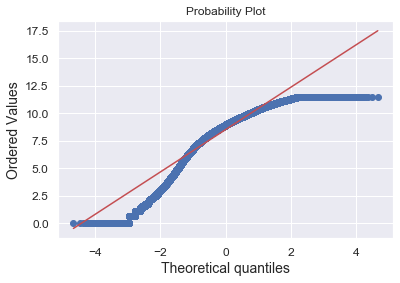

In [54]:
# Now check residuals
from scipy import stats
import pylab

stats.probplot(train.Weekly_Sales, dist="norm", plot=pylab )
pylab.show()

In [55]:
#### train X= Exery thing except Weekly_Sales
train_X=train.drop(['Weekly_Sales','Date'], axis=1)

#### train Y= Only Weekly_Sales 
train_y=train['Weekly_Sales'] 

#### Test_X
test_X=test.drop('Date',axis=1).copy()

train_X.shape, train_y.shape, test_X.shape

((420212, 15), (420212,), (115064, 15))

In [56]:
## Methood 1..
clf = LinearRegression()
clf.fit(train_X, train_y)
y_pred_linear=clf.predict(test_X)
acc_linear=round( clf.score(train_X, train_y) * 100, 2)
print ('scorbe:'+str(acc_linear) + ' percent')

scorbe:11.03 percent


In [57]:
import statsmodels.api as sm

In [58]:
train_x = sm.add_constant(train_X)


In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420212 entries, 0 to 421569
Data columns (total 17 columns):
Store             420212 non-null int64
Dept              420212 non-null int64
Date              420212 non-null datetime64[ns]
Weekly_Sales      420212 non-null float64
IsHoliday         420212 non-null bool
Type              420212 non-null int64
Size              420212 non-null int64
Temperature       420212 non-null int32
Fuel_Price        420212 non-null int32
MarkDown1         420212 non-null int32
MarkDown2         420212 non-null int32
MarkDown3         420212 non-null int32
MarkDown4         420212 non-null int32
Date_dayofweek    420212 non-null int64
Date_month        420212 non-null int64
Date_year         420212 non-null int64
Date_day          420212 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int32(6), int64(8)
memory usage: 61.3 MB


In [60]:
lm=sm.OLS(train_y,train_X.astype(int)).fit()

In [61]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     3720.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:29:09   Log-Likelihood:            -8.6782e+05
No. Observations:              420212   AIC:                         1.736e+06
Df Residuals:                  420197   BIC:                         1.736e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Store             -0.0134      0.000    -56.

In [62]:
clf = RandomForestRegressor(n_estimators=5, n_jobs=1)
clf.fit(train_X, train_y)
y_pred_rf=clf.predict(test_X)
acc_rf= round(clf.score(train_X, train_y) * 100, 2)
print ("Accuracy: %i %% \n"%acc_rf)

Accuracy: 99 % 



In [63]:
train_y.head(5)

0    10.123627
1    10.831825
2     9.528139
3    10.595509
4    10.380653
Name: Weekly_Sales, dtype: float64

In [64]:
clf=DecisionTreeRegressor()
clf.fit(train_X, train_y)
y_pred_dt= clf.predict(test_X)
acc_dt = round( clf.score(train_X, train_y) * 100, 2)
print (str(acc_dt) + ' percent')

100.0 percent


In [65]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest','Decision Tree'],
    
    'Score': [acc_linear, acc_rf,acc_dt]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Tree,100.00
1,Random Forest,99.31
0,Linear Regression,11.03


In [66]:
# Prediction value using Random Forest model..
submission = pd.DataFrame({
        "Store_Dept_Date": test.Store.astype(str)+'_'+test.Dept.astype(str)+'_'+test.Date.astype(str),
        "Weekly_Sales": y_pred_rf
    })

submission.to_csv('weekly_sales predicted.csv', index=False)
#submission.to_excel(writer,'Weekly_sales Pred',index=False)

In [67]:
%pwd

'C:\\Users\\HP\\Documents\\Deepak\\ALabs\\proj\\2. Walmart Store Sales Forecasting\\data'

In [68]:
submission['Weekly_Sales_actual'] = np.exp(submission['Weekly_Sales'])

In [69]:
submission.head(5)

,Store_Dept_Date,Weekly_Sales,Weekly_Sales_actual
0,1_1_2012-11-02,9.842745,18821.308368
1,1_2_2012-11-02,10.750413,46649.293096
2,1_3_2012-11-02,9.258836,10496.905762
3,1_4_2012-11-02,10.559690,38549.169419
4,1_5_2012-11-02,10.374386,32028.653190


<h2>Method 2 : </h2>